<a href="https://colab.research.google.com/github/andymacale/progetto_lab/blob/main/progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
pip install -r requirements.txt

In [8]:
# Importazione delle librerie
import rawpy # per caricare le immagini in formato RAW
import imageio # per gestire l'IO delle immagini

In [13]:
from google.colab import files
path = files.upload()

Saving DSC_0118.NEF to DSC_0118 (1).NEF


In [15]:
if path:
    try:
       nome = list(path.keys())[0]
       with rawpy.imread(nome) as raw:
          immagine = raw.postprocess()
    except:
        print('Formato immagine non valido!')

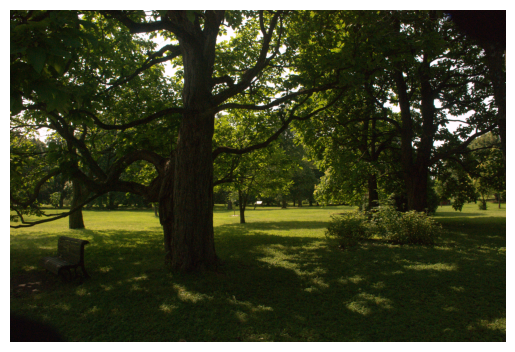

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plotImmagine = plt.imshow(immagine)
plt.axis('off')
plt.show()